### Hybrid Recommender System for Amazon

Objective:
To build a hybrid recommender system that combines collaborative filtering and content-based filtering techniques to recommend Amazon products to users based on their historical ratings and review texts.

In [3]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
# Load data

review_data = pd.read_csv('Data/amazon_reviews.csv')

review_data = review_data[['verified', 'itemName', 'description', 'brand', 'feature', 'category', 'price', 'rating', 'summary', 'reviewText', 'vote']]
review_data = review_data.fillna('') # Fill missing values with empty strings

review_data['merged_data'] = review_data['itemName'] + ' ' + review_data['description'] + ' ' + review_data['brand'] + ' ' + review_data['feature'] + ' ' + review_data['category'] + ' ' + review_data['summary'] + ' ' + review_data['reviewText']

#review_data.head()

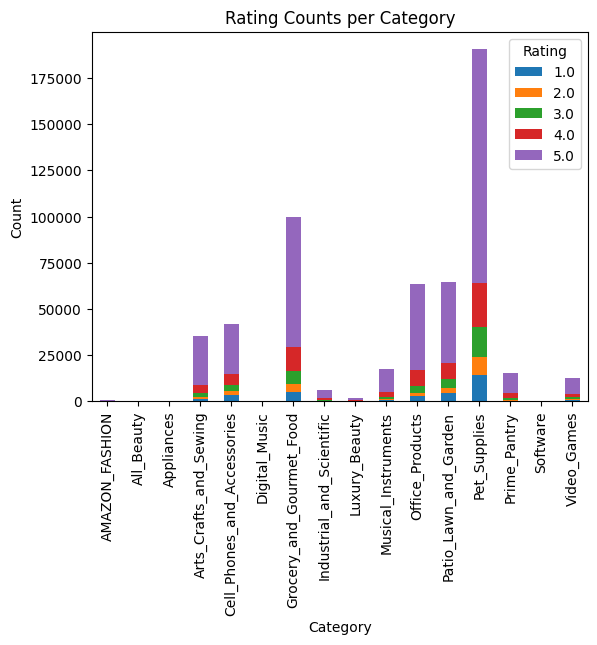

In [5]:
# Plotting all categories vs rating graph

rating_counts_per_category = review_data.groupby('category')['rating'].value_counts().unstack(fill_value=0)
rating_counts_per_category


# Plot stacked bar chart
rating_counts_per_category.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Rating Counts per Category')
plt.legend(title='Rating')
plt.show()

In [6]:
#Category counts
category_counts = review_data['category'].value_counts()

# Get top 8 categories
top_5_categories = category_counts.head(5)

top_5_categories_list = top_5_categories.index.tolist()

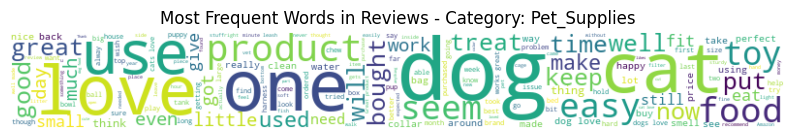

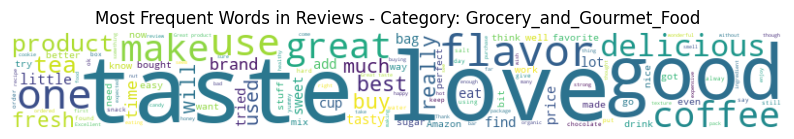

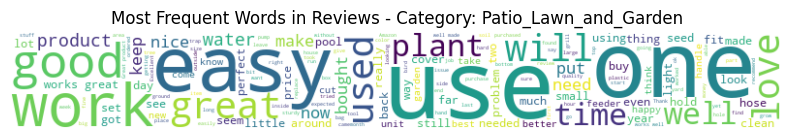

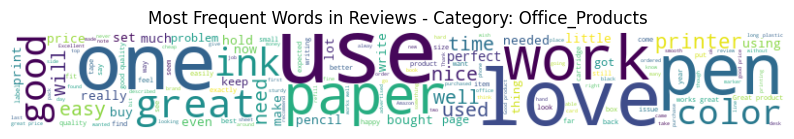

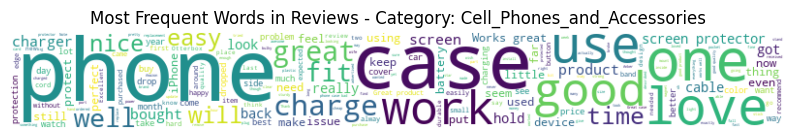

In [7]:
# WordCount per category

from wordcloud import WordCloud

# Generate word cloud for each category
for category in top_5_categories_list:
    # Drop rows with missing values in 'reviewText' column
    text = ' '.join(review_data[review_data['category'] == category]['reviewText'].dropna().astype(str))
    
    # Create WordCloud object with max_words parameter
    wordcloud = WordCloud(width=800, height=100, background_color='white', max_words=200).generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Frequent Words in Reviews - Category: {category}')
    plt.axis('off')
    plt.show()

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

review_data['merged_data'] = review_data['merged_data'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
vectorizer = TfidfVectorizer() 
text_features = vectorizer.fit_transform(review_data['merged_data']) 
text_features.shape

(551159, 156958)

In [10]:
# Splitting data into training set and test set

X = review_data['merged_data']
Y = review_data['rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)